In [1]:
import pandas as pd
import numpy as np
import os 
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def evaluate_models(pred_file_path, threshold):
    pred_file = pred_file_path.split('/')[-1]
    pred_dti_df = pd.read_csv(pred_file_path, skiprows=1, usecols=[0,1,2,3])
    pdti_df = pred_dti_df.sort_values(by=["Protein_ID", "Compound_ID"]).drop_duplicates(subset = ["Protein_ID", "Compound_ID"], keep=False)
    
    pos_df = pdti_df.loc[pdti_df.label==1]
    TP = sum(pos_df.predicted.values>threshold)
    FN = len(pos_df) - TP
    pos_pred = sum(pos_df.predicted.values>threshold)/ len(pos_df)
    
    neg_df = pdti_df.loc[pdti_df.label==0]
    TN = sum(neg_df.predicted.values<=threshold)
    FP = len(neg_df) - TN
    neg_pred = sum(neg_df.predicted.values<=threshold)/ len(neg_df)
    
    MCC = (TN*TP - FN*FP)/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)) 
    
    
    total = len(pos_df) + len(neg_df)
    
    Accuracy = ((TP + TN))/(TP + FP + TN + FN)
    Recall = TP/(TP + FN)
    precision = TP/(TP + FP)
    F1 = (2*Recall*precision)/(Recall + precision)
    
    if len(pred_file.split('_')) == 7:
        split_name = pred_file.split('.')[0].split('_')
        epoch = split_name[3]
        dropoutProbability = split_name[-2] + '.' + split_name[-1]
        dataType = split_name[0]

    elif len(pred_file.split('_')) == 6:
        split_name = pred_file.split('.')[0].split('_')
        epoch = split_name[3]
        dropoutProbability = split_name[-1]
        dataType = split_name[0]
        
    return(pos_pred, neg_pred, TP, FN, TN, FP, MCC, Accuracy, Recall, precision, F1, epoch, dropoutProbability, dataType)

## Reading hyperparameter optimization grid-search model prediction- analysis

In [3]:
th = 0.5
csv_files = !ls ./CNN_results/Hyp_opt/epochs_dropout_combination/model_prediction/*.csv

training_dict = {}
test_dict = {}
validation_dict = {}

test_pos = []
test_neg = []
test_TP = []
test_TN = []
test_FP = []
test_FN = []
test_acc = []
test_rec = []
test_pre = []
test_f1 = []
test_nepoch = []
test_dropout = []
test_dtype = []
test_MCC = []

training_pos = []
training_neg = []
training_TP = []
training_TN = []
training_FP = []
training_FN = []
training_acc = []
training_rec = []
training_pre = []
training_f1 = []
training_nepoch = []
training_dropout = []
training_dtype = []
training_MCC = []


validation_pos = []
validation_neg = []
validation_TP = []
validation_TN = []
validation_FP = []
validation_FN = []
validation_acc = []
validation_rec = []
validation_pre = []
validation_f1 = []
validation_nepoch = []
validation_dropout = []
validation_dtype = []
validation_MCC = []



for files in tqdm(csv_files):
    postive, negative, tp, fn, tn, fp, mcc, ac, re, pr, f1_sc, n_ep, dp, d_type = evaluate_models(files, th)
    
    if d_type == 'test':
        test_pos.append(postive)
        test_neg.append(negative)
        test_TP.append(tp)
        test_FN.append(fn)
        test_TN.append(tn)
        test_FP.append(fp)
        test_acc.append(ac)
        test_rec.append(re)
        test_pre.append(pr)
        test_f1.append(f1_sc)
        test_nepoch.append(n_ep)
        test_dropout.append(dp)
        test_dtype.append(d_type)
        test_MCC.append(mcc)
    elif d_type == 'training':
        training_pos.append(postive)
        training_neg.append(negative)
        training_TP.append(tp)
        training_FN.append(fn)
        training_TN.append(tn)
        training_FP.append(fp)
        training_acc.append(ac)
        training_rec.append(re)
        training_pre.append(pr)
        training_f1.append(f1_sc)        
        training_nepoch.append(n_ep)
        training_dropout.append(dp) 
        training_dtype.append(d_type)
        training_MCC.append(mcc)
    elif d_type == 'validation':
        validation_pos.append(postive)
        validation_neg.append(negative)
        validation_TP.append(tp)
        validation_FN.append(fn)
        validation_TN.append(tn)
        validation_FP.append(fp)
        validation_acc.append(ac)
        validation_rec.append(re)
        validation_pre.append(pr)
        validation_f1.append(f1_sc)
        validation_nepoch.append(n_ep)
        validation_dropout.append(dp) 
        validation_dtype.append(d_type)
        validation_MCC.append(mcc)
        
        
test_dict = {'Type': test_dtype, 'Positive': test_pos, 'Negative': test_neg, 'TP': test_TP, 'FN': test_FN, 'TN': test_TN, 'FP': test_FP,'MCC':test_MCC, 'Accuracy':test_acc, 'Recall':test_rec, 'Precision':test_pre, 'F1 Score': test_f1,'epoch': test_nepoch, 'dropout': test_dropout}


training_dict = {'Type': training_dtype, 'Positive': training_pos, 'Negative': training_neg, 'TP': training_TP, 'FN': training_FN, 'TN': training_TN, 'FP': training_FP,'MCC':training_MCC, 'Accuracy':training_acc, 'Recall':training_rec, 'Precision': training_pre, 'F1 Score': training_f1,'epoch': training_nepoch, 'dropout': training_dropout}

validation_dict = {'Type': validation_dtype, 'Positive': validation_pos, 'Negative': validation_neg, 'TP': validation_TP, 'FN': validation_FN, 'TN': validation_TN, 'FP': validation_FP,'MCC':validation_MCC, 'Accuracy': validation_acc, 'Recall': validation_rec, 'Precision':validation_pre, 'F1 Score': validation_f1,'epoch': validation_nepoch, 'dropout': validation_dropout}


test_df = pd.DataFrame(test_dict)
training_df = pd.DataFrame(training_dict)
validation_df = pd.DataFrame(validation_dict)


  2%|▉                                         | 16/750 [00:00<00:20, 35.37it/s]/tmp/ipykernel_32110/2296986670.py:16: RuntimeWarning: invalid value encountered in double_scalars
  MCC = (TN*TP - FN*FP)/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
 21%|████████▊                                | 161/750 [00:05<00:19, 30.95it/s]/tmp/ipykernel_32110/2296986670.py:16: RuntimeWarning: invalid value encountered in double_scalars
  MCC = (TN*TP - FN*FP)/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
 36%|██████████████▋                          | 269/750 [00:09<00:30, 15.72it/s]/tmp/ipykernel_32110/2296986670.py:16: RuntimeWarning: invalid value encountered in double_scalars
  MCC = (TN*TP - FN*FP)/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))
 69%|████████████████████████████▎            | 518/750 [00:25<00:07, 30.21it/s]/tmp/ipykernel_32110/2296986670.py:16: RuntimeWarning: invalid value encountered in double_scalars
  MCC = (TN*TP - FN*FP)/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN

In [4]:
max_val_f1 = np.max(validation_f1)
val_f1_max_idx = np.argmax(validation_f1)

In [5]:
print(val_f1_max_idx)
print(max_val_f1)

print('===== epoch ======')
print(validation_nepoch[193])

print('====== dp =====')
print(validation_dropout[193])

print('====== ac =====')
print(validation_acc[193])

print('===== f1 ======')
print(validation_f1[193])

print('===== pr ======')
print(validation_pre[193])

print('===== rec ======')
print(validation_rec[193])

193
0.7980852915578763
===== epoch ======
70
====== dp =====
0.3
====== ac =====
0.790990990990991
===== f1 ======
0.7980852915578763
===== pr ======
0.7718855218855218
===== rec ======
0.8261261261261261


# Analysing prediction on 10 split dataset 

In [6]:
def evaluate_split_predictions(pred_file_path, threshold):
    pred_file = pred_file_path.split('/')[-1]
    pred_dti_df = pd.read_csv(pred_file_path, skiprows=1, usecols=[0,1,2,3])
    pdti_df = pred_dti_df.sort_values(by=["Protein_ID", "Compound_ID"]).drop_duplicates(subset = ["Protein_ID", "Compound_ID"], keep=False)
    
    pos_df = pdti_df.loc[pdti_df.label==1]
    TP = sum(pos_df.predicted.values>threshold)
    FN = len(pos_df) - TP
    pos_pred = sum(pos_df.predicted.values>threshold)/ len(pos_df)
    
    neg_df = pdti_df.loc[pdti_df.label==0]
    TN = sum(neg_df.predicted.values<=threshold)
    FP = len(neg_df) - TN
    neg_pred = sum(neg_df.predicted.values<=threshold)/ len(neg_df)
    
    MCC = (TN*TP - FN*FP)/np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)) 
    
    
    total = len(pos_df) + len(neg_df)
    
    Accuracy = ((TP + TN))/(TP + FP + TN + FN)
    Recall = TP/(TP + FN)
    precision = TP/(TP + FP)
    F1 = (2*Recall*precision)/(Recall + precision)
    
    split_name = pred_file.split('.')[0].split('_')
    dataType = split_name[0]
        
    return(pos_pred, neg_pred, TP, FN, TN, FP, MCC, Accuracy, Recall, precision, F1, dataType)

In [7]:
csv_files_split = !ls ./CNN_results_split_final/predictions/*.csv

In [8]:
Final_preds = csv_files_split[0:2]
split_predictions = csv_files_split[2:]

In [9]:
training_split_dict = {}
test_split_dict = {}
validation_split_dict = {}

test_pos_split = []
test_neg_split = []
test_TP_split = []
test_TN_split = []
test_FP_split = []
test_FN_split = []
test_acc_split = []
test_rec_split = []
test_pre_split = []
test_f1_split = []
test_dtype_split = []
test_MCC_split = []

training_pos_split = []
training_neg_split = []
training_TP_split = []
training_TN_split = []
training_FP_split = []
training_FN_split = []
training_acc_split = []
training_rec_split = []
training_pre_split = []
training_f1_split = []
training_dtype_split = []
training_MCC_split = []


validation_pos_split = []
validation_neg_split = []
validation_TP_split = []
validation_TN_split = []
validation_FP_split = []
validation_FN_split = []
validation_acc_split = []
validation_rec_split = []
validation_pre_split = []
validation_f1_split = []
validation_dtype_split = []
validation_MCC_split = []


for files in tqdm(split_predictions):
    postive_s, negative_s, tp_s, fn_s, tn_s, fp_s, mcc_s, ac_s, re_s, pr_s, f1_sc_s, d_type_s = evaluate_split_predictions(files, th)
    
    if d_type_s == 'test':
        test_pos_split.append(postive_s)
        test_neg_split.append(negative_s)
        test_TP_split.append(tp_s)
        test_FN_split.append(fn_s)
        test_TN_split.append(tn_s)
        test_FP_split.append(fp_s)
        test_acc_split.append(ac_s)
        test_rec_split.append(re_s)
        test_pre_split.append(pr_s)
        test_f1_split.append(f1_sc_s)
        test_dtype_split.append(d_type_s)
        test_MCC_split.append(mcc_s)
    elif d_type_s == 'training':
        training_pos_split.append(postive_s)
        training_neg_split.append(negative_s)
        training_TP_split.append(tp_s)
        training_FN_split.append(fn_s)
        training_TN_split.append(tn_s)
        training_FP_split.append(fp_s)
        training_acc_split.append(ac_s)
        training_rec_split.append(re_s)
        training_pre_split.append(pr_s)
        training_f1_split.append(f1_sc_s)        
        training_dtype_split.append(d_type_s)
        training_MCC_split.append(mcc_s)
    elif d_type_s == 'validation':
        validation_pos_split.append(postive_s)
        validation_neg_split.append(negative_s)
        validation_TP_split.append(tp_s)
        validation_FN_split.append(fn_s)
        validation_TN_split.append(tn_s)
        validation_FP_split.append(fp_s)
        validation_acc_split.append(ac_s)
        validation_rec_split.append(re_s)
        validation_pre_split.append(pr_s)
        validation_f1_split.append(f1_sc_s)
        validation_dtype_split.append(d_type_s)
        validation_MCC_split.append(mcc_s)
        
        
test_split_dict = {'Type': test_dtype_split, 'Positive': test_pos_split, 'Negative': test_neg_split, 'TP': test_TP_split, 'FN': test_FN_split, 'TN': test_TN_split, 'FP': test_FP_split,'MCC':test_MCC_split, 'Accuracy':test_acc_split, 'Recall':test_rec_split, 'Precision':test_pre_split, 'F1 Score': test_f1_split}

training_split_dict = {'Type': training_dtype_split, 'Positive': training_pos_split, 'Negative': training_neg_split, 'TP': training_TP_split, 'FN': training_FN_split, 'TN': training_TN_split, 'FP': training_FP_split,'MCC':training_MCC_split, 'Accuracy':training_acc_split, 'Recall':training_rec_split, 'Precision': training_pre_split, 'F1 Score': training_f1_split}

validation_split_dict = {'Type': validation_dtype_split, 'Positive': validation_pos_split, 'Negative': validation_neg_split, 'TP': validation_TP_split, 'FN': validation_FN_split, 'TN': validation_TN_split, 'FP': validation_FP_split,'MCC':validation_MCC_split, 'Accuracy': validation_acc_split, 'Recall': validation_rec_split, 'Precision':validation_pre_split, 'F1 Score': validation_f1_split}


test_df_split = pd.DataFrame(test_split_dict)
training_df_split = pd.DataFrame(training_split_dict)
validation_df_split = pd.DataFrame(validation_split_dict)




100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 23.70it/s]


## Split data prediction on test dataset 

In [10]:
test_df_split

,Type,Positive,Negative,TP,FN,TN,FP,MCC,Accuracy,Recall,Precision,F1 Score
0,test,0.814414,0.732432,904,206,813,297,0.548694,0.773423,0.814414,0.752706,0.782345
1,test,0.797297,0.771171,885,225,856,254,0.568663,0.784234,0.797297,0.776997,0.787016
2,test,0.874775,0.672973,971,139,747,363,0.559254,0.773874,0.874775,0.727886,0.794599
3,test,0.821622,0.738739,912,198,820,290,0.562295,0.780180,0.821622,0.758735,0.788927
4,test,0.845946,0.703604,939,171,781,329,0.555203,0.774775,0.845946,0.740536,0.789739
5,test,0.781982,0.747748,868,242,830,280,0.530040,0.764865,0.781982,0.756098,0.768822
6,test,0.825225,0.712613,916,194,791,319,0.541281,0.768919,0.825225,0.741700,0.781237
7,test,0.783784,0.723423,870,240,803,307,0.508134,0.753604,0.783784,0.739167,0.760822
8,test,0.804505,0.721622,893,217,801,309,0.527943,0.763063,0.804505,0.742928,0.772491
9,test,0.722523,0.783784,802,308,870,240,0.507259,0.753153,0.722523,0.769674,0.745353


## Split data prediction on training dataset 

In [11]:
training_df_split

,Type,Positive,Negative,TP,FN,TN,FP,MCC,Accuracy,Recall,Precision,F1 Score
0,training,0.988626,0.974200,8779,101,8647,229,0.962929,0.981415,0.988626,0.974578,0.981552
1,training,0.995158,0.989635,8837,43,8784,92,0.984809,0.992397,0.995158,0.989696,0.992420
2,training,0.997860,0.979721,8861,19,8696,180,0.977746,0.988793,0.997860,0.980091,0.988896
3,training,0.995158,0.984114,8837,43,8735,141,0.979334,0.989637,0.995158,0.984295,0.989696
4,training,0.996959,0.970482,8853,27,8614,262,0.967787,0.983724,0.996959,0.971256,0.983940
5,training,0.985135,0.982312,8748,132,8719,157,0.967451,0.983724,0.985135,0.982369,0.983750
6,training,0.994820,0.983438,8834,46,8729,147,0.978324,0.989130,0.994820,0.983632,0.989194
7,training,0.988176,0.985016,8775,105,8743,133,0.973197,0.986596,0.988176,0.985070,0.986620
8,training,0.989752,0.974651,8789,91,8651,225,0.964516,0.982203,0.989752,0.975039,0.982340
9,training,0.964527,0.987494,8565,315,8765,111,0.952268,0.976008,0.964527,0.987206,0.975735


## Split data prediction on validation dataset 

In [12]:
validation_df_split

,Type,Positive,Negative,TP,FN,TN,FP,MCC,Accuracy,Recall,Precision,F1 Score
0,validation,0.811712,0.727027,901,209,807,303,0.540681,0.769369,0.811712,0.748339,0.778738
1,validation,0.814414,0.771171,904,206,856,254,0.586134,0.792793,0.814414,0.780656,0.797178
2,validation,0.872072,0.686486,968,142,762,348,0.568433,0.779279,0.872072,0.735562,0.798021
3,validation,0.809910,0.730631,899,211,811,299,0.542247,0.770270,0.809910,0.750417,0.779029
4,validation,0.836036,0.716216,928,182,795,315,0.556260,0.776126,0.836036,0.746581,0.788780
5,validation,0.803604,0.737838,892,218,819,291,0.542616,0.770721,0.803604,0.754015,0.778020
6,validation,0.818018,0.731532,908,202,812,298,0.551616,0.774775,0.818018,0.752902,0.784111
7,validation,0.803604,0.746847,892,218,829,281,0.551339,0.775225,0.803604,0.760443,0.781428
8,validation,0.798198,0.747748,886,224,830,280,0.546642,0.772973,0.798198,0.759863,0.778559
9,validation,0.707207,0.779279,785,325,865,245,0.487755,0.743243,0.707207,0.762136,0.733645


In [13]:
Final_preds

['./CNN_results_split_final/predictions/Final_training_prediction.csv',
 './CNN_results_split_final/predictions/test_Final_output.csv']

In [14]:
evaluate_split_predictions(Final_preds[0], 0.5)

(0.9981081081081081,
 0.9798125450612833,
 11079,
 21,
 10872,
 224,
 0.9780875168136708,
 0.9889619751306542,
 0.9981081081081081,
 0.9801822524993364,
 0.9890639646475917,
 'Final')

## Hyperparamter optimization prediction analysis

In [17]:
vepoc = []
for i in validation_nepoch:
    vepoc.append(int(i))
    

In [22]:
vdp = []
for i in validation_dropout:
    vdp.append(float(i))
    

vfa = np.asarray(validation_f1).reshape(250, 1)
# vfa = []
# for i in validation_f1:
#     vfa.append(float(i))

In [23]:
vdp_100 = vdp[0:10]
vep_100 = vepoc[0:10]
vfa_100 = vfa[0:10]


vdp_10 = vdp[10:20]
vep_10 = vepoc[10:20]
vfa_10 = vfa[10:20]

vdp_110 = vdp[20:30]
vep_110 = vepoc[20:30]
vfa_110 = vfa[20:30]

vdp_120 = vdp[30:40]
vep_120 = vepoc[30:40]
vfa_120 = vfa[30:40]

vdp_130 = vdp[40:50]
vep_130 = vepoc[40:50]
vfa_130 = vfa[40:50]

vdp_140 = vdp[50:60]
vep_140 = vepoc[50:60]
vfa_140 = vfa[50:60]

vdp_150 = vdp[60:70]
vep_150 = vepoc[60:70]
vfa_150 = vfa[60:70]

vdp_15 = vdp[70:80]
vep_15 = vepoc[70:80]
vfa_15 = vfa[70:80]

vdp_20 = vdp[80:90]
vep_20 = vepoc[80:90]
vfa_20 = vfa[80:90]

vdp_25 = vdp[90:100]
vep_25 = vepoc[90:100]
vfa_25 = vfa[90:100]

vdp_30 = vdp[100:110]
vep_30 = vepoc[100:110]
vfa_30 = vfa[100:110]


vdp_35 = vdp[110:120]
vep_35 = vepoc[110:120]
vfa_35 = vfa[110:120]

vdp_40 = vdp[120:130]
vep_40 = vepoc[120:130]
vfa_40 = vfa[120:130]

vdp_45 = vdp[130:140]
vep_45 = vepoc[130:140]
vfa_45 = vfa[130:140]

vdp_50 = vdp[140:150]
vep_50 = vepoc[140:150]
vfa_50 = vfa[140:150]

vdp_55 = vdp[150:160]
vep_55 = vepoc[150:160]
vfa_55 = vfa[150:160]

vdp_5 = vdp[160:170]
vep_5 = vepoc[160:170]
vfa_5 = vfa[160:170]

vdp_60 = vdp[170:180]
vep_60 = vepoc[170:180]
vfa_60 = vfa[170:180]

vdp_65 = vdp[180:190]
vep_65 = vepoc[180:190]
vfa_65 = vfa[180:190]

vdp_70 = vdp[190:200]
vep_70 = vepoc[190:200]
vfa_70 = vfa[190:200]

vdp_75 = vdp[200:210]
vep_75 = vepoc[200:210]
vfa_75 = vfa[200:210]

vdp_80 = vdp[210:220]
vep_80 = vepoc[210:220]
vfa_80 = vfa[210:220]

vdp_85 = vdp[220:230]
vep_85 = vepoc[220:230]
vfa_85 = vfa[220:230]

vdp_90 = vdp[230:240]
vep_90 = vepoc[230:240]
vfa_90 = vfa[230:240]

vdp_95 = vdp[240:250]
vep_95 = vepoc[240:250]
vfa_95 = vfa[240:250]




In [26]:
max_fa_ls = [np.max(vfa_5), np.max(vfa_10), np.max(vfa_15), np.max(vfa_20), np.max(vfa_25), np.max(vfa_30), np.max(vfa_35), np.max(vfa_40), np.max(vfa_45), np.max(vfa_50), np.max(vfa_55), np.max(vfa_60), np.max(vfa_65), np.max(vfa_70),np.max(vfa_75), np.max(vfa_80), np.max(vfa_85), np.max(vfa_90),np.max(vfa_95), np.max(vfa_100),np.max(vfa_110), np.max(vfa_120),np.max(vfa_130), np.max(vfa_140), np.max(vfa_150)]

In [27]:
epc_ls = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150]

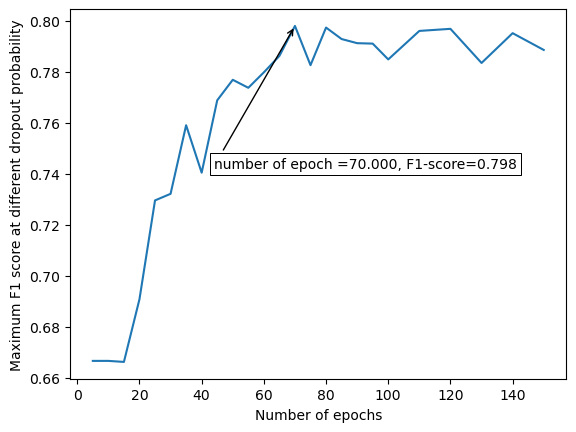

In [176]:
x= np.asarray(epc_ls)
y = np.asarray(max_fa_ls)


fig, ax = plt.subplots()
ax.plot(x,y)

# plt.plot(epc_ls, max_fa_ls)
plt.xlabel('Number of epochs')
plt.ylabel('Maximum F1 score at different dropout probability')

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "number of epoch ={:.3f}, F1-score={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.9,0.6), **kw)

annot_max(x,y)

plt.savefig('./CNN_results/hyp_opt.png')
